<a href="https://colab.research.google.com/github/Bhargavvv412/linear-models/blob/main/Algerian_forest_fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [288]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/Fire Forest Dataset.csv')

In [289]:
new_columns = ['Day', 'Month', 'Year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC',
               'DC', 'ISI', 'BUI', 'FWI', 'Classes']
dataset.columns = new_columns

# Verify the changes
print(dataset.columns)

# Save the updated dataset (optional)
dataset.to_csv('updated_forest_fire.csv', index=False)

Index(['Day', 'Month', 'Year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')


In [290]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          247 non-null    object
 1   Month        246 non-null    object
 2   Year         246 non-null    object
 3   Temperature  246 non-null    object
 4   RH           246 non-null    object
 5   Ws           246 non-null    object
 6   Rain         246 non-null    object
 7   FFMC         246 non-null    object
 8   DMC          246 non-null    object
 9   DC           246 non-null    object
 10  ISI          246 non-null    object
 11  BUI          246 non-null    object
 12  FWI          246 non-null    object
 13  Classes      245 non-null    object
dtypes: object(14)
memory usage: 27.3+ KB


#Data Cleaning

In [291]:
dataset[dataset.isnull().any(axis=1)]

,Day,Month,Year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,Sidi-Bel Abbes Region ForestFire Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [292]:
dataset.loc[:123,"Region"]=0
dataset.loc[123:,"Region"]=1
df = dataset

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          247 non-null    object 
 1   Month        246 non-null    object 
 2   Year         246 non-null    object 
 3   Temperature  246 non-null    object 
 4   RH           246 non-null    object 
 5   Ws           246 non-null    object 
 6   Rain         246 non-null    object 
 7   FFMC         246 non-null    object 
 8   DMC          246 non-null    object 
 9   DC           246 non-null    object 
 10  ISI          246 non-null    object 
 11  BUI          246 non-null    object 
 12  FWI          246 non-null    object 
 13  Classes      245 non-null    object 
 14  Region       248 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.2+ KB


In [294]:
df[['Region']]=df[['Region']].astype(int)

In [295]:
df

,Day,Month,Year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,0
1,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
2,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
3,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
4,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
244,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
245,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
246,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [296]:
df.isnull().sum()

,0
Day,1
Month,2
Year,2
Temperature,2
RH,2
Ws,2
Rain,2
FFMC,2
DMC,2
DC,2


In [297]:
df[df.isnull().any(axis=1)]

,Day,Month,Year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
124,Sidi-Bel Abbes Region ForestFire Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
169,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [298]:
#remove the null values
df=df.dropna().reset_index(drop=True)

In [299]:
df.isnull().sum()

,0
Day,0
Month,0
Year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [300]:
df = df.drop(123).reset_index(drop=True)

In [301]:
df.iloc[[123]]

,Day,Month,Year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          244 non-null    object
 1   Month        244 non-null    object
 2   Year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


Changes the required columns as interger data type

In [303]:
# Drop rows with non-numeric values
df = df[df[['Day','Month', 'Year', 'Temperature', 'RH', 'Ws']].applymap(lambda x: str(x).isdigit()).all(axis=1)]

# Convert the specified columns to integers
df[['Day','Month', 'Year', 'Temperature', 'RH', 'Ws']] = df[['Day','Month', 'Year', 'Temperature', 'RH', 'Ws']].astype(int)

# Verify the changes
print(df.dtypes)
df.head()

Day             int64
Month           int64
Year            int64
Temperature     int64
RH              int64
Ws              int64
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int64
dtype: object


<ipython-input-303-fdee9f3a9136>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df[df[['Day','Month', 'Year', 'Temperature', 'RH', 'Ws']].applymap(lambda x: str(x).isdigit()).all(axis=1)]
<ipython-input-303-fdee9f3a9136>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Day','Month', 'Year', 'Temperature', 'RH', 'Ws']] = df[['Day','Month', 'Year', 'Temperature', 'RH', 'Ws']].astype(int)


,Day,Month,Year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
1,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
2,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
3,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
4,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
5,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [304]:
#chaninng other to float dtype
# df = df[df[['Rain', 'FFMC', 'DMC','DC', 'ISI', 'BUI', 'FWI']].applymap(lambda x: str(x).isdigit()).all(axis=1)]
# df[['Rain', 'FFMC', 'DMC','DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC','DC', 'ISI', 'BUI', 'FWI']].astype(float)
col = ['Rain', 'FFMC', 'DMC','DC', 'ISI', 'BUI', 'FWI']
# Verify the changes
df['Rain']=df['Rain'].astype(float)
print(df.dtypes)


for c in col:  # Use a different variable name to avoid overwriting `col`
    try:
        df[c] = df[c].astype(float)  # Attempt to convert the column to float
    except ValueError:
        df[c] = pd.to_numeric(df[c], errors='coerce')  # Replace non-numeric values with NaN

df

Day              int64
Month            int64
Year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region           int64
dtype: object


<ipython-input-304-5d03b38ee758>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rain']=df['Rain'].astype(float)
<ipython-input-304-5d03b38ee758>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = df[c].astype(float)  # Attempt to convert the column to float
<ipython-input-304-5d03b38ee758>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,Day,Month,Year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
1,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
2,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
3,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
4,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
5,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [305]:
df.head(5)

,Day,Month,Year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
1,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
2,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
3,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
4,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
5,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


#EDA

In [306]:
df.drop(['Day','Month','Year'],axis=1)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
1,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
2,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
3,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
4,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
5,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [307]:
#encoding of categoriges in classses
df['Classes']=np.where( df['Classes'].str.contains('not fire'),0,1)

In [308]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


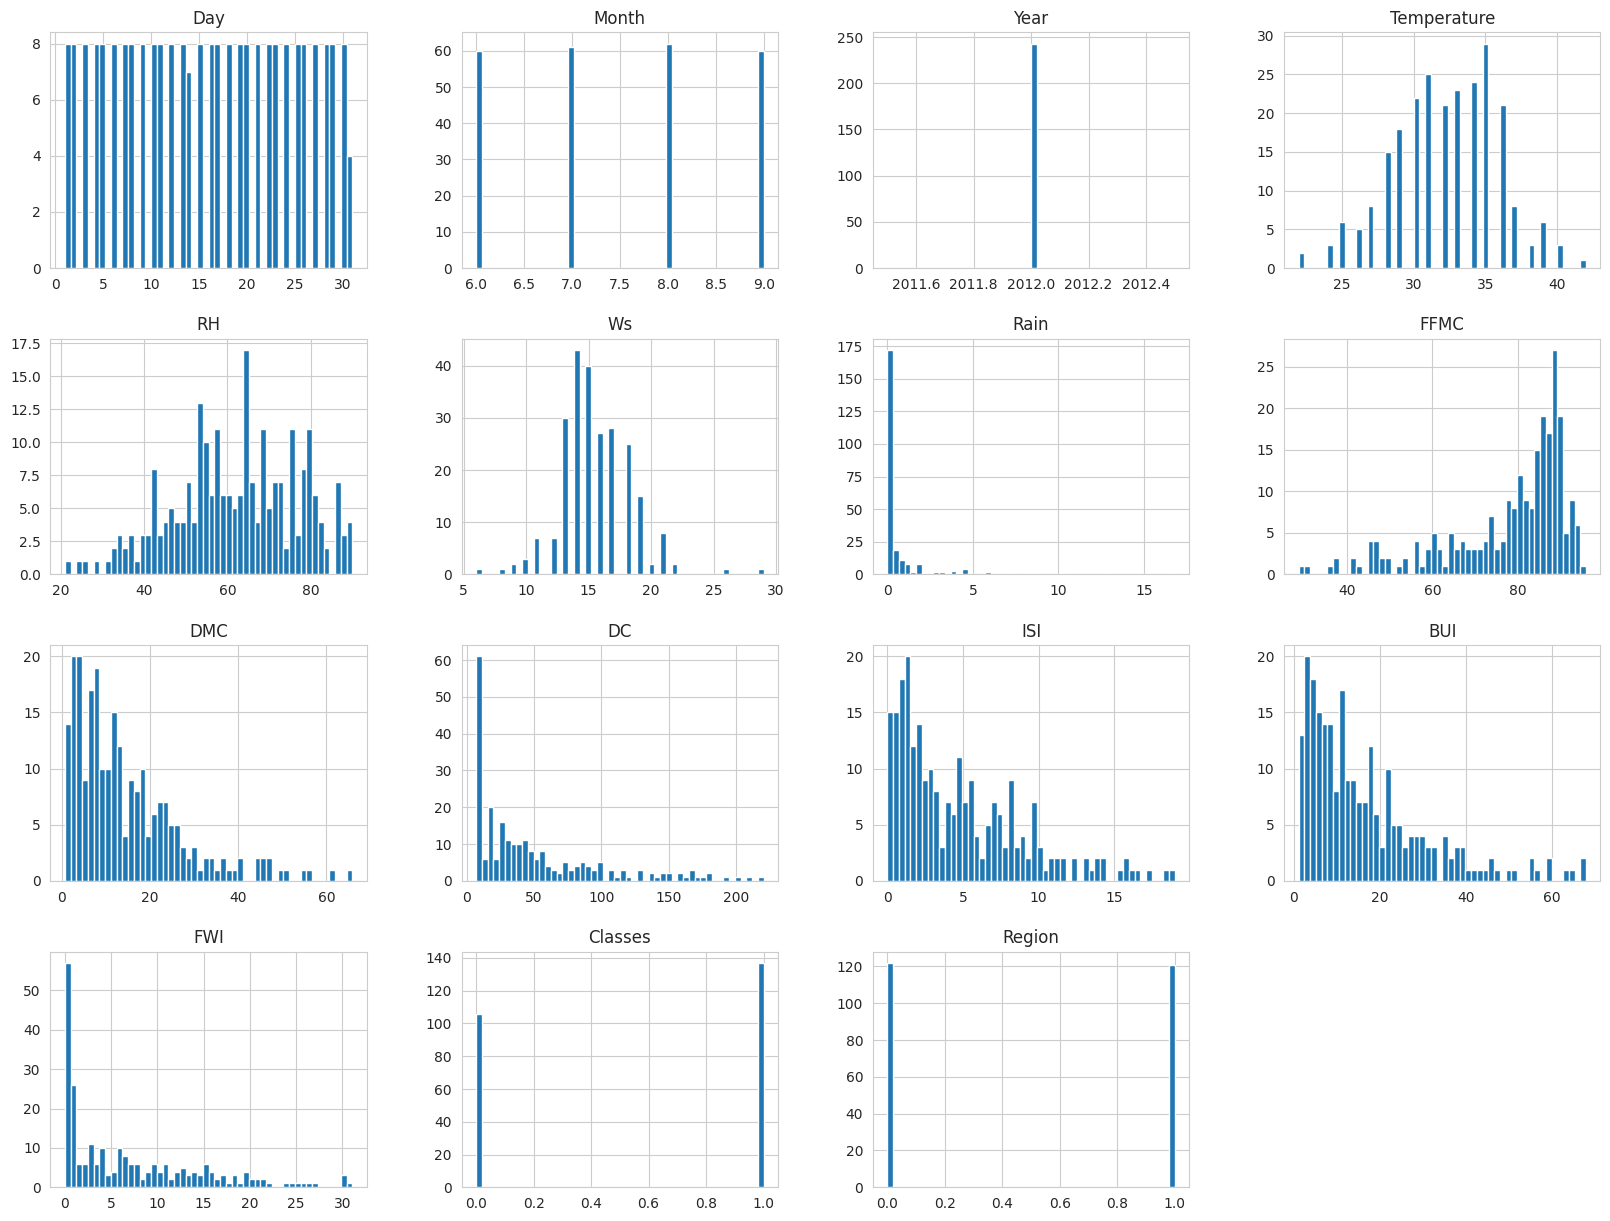

In [309]:
#plot  density plot for all featues
df.hist(bins=50 ,figsize=(20,15))
plt.show()

In [310]:
## percentage for pie chart
percentage = df['Classes'].value_counts(normalize = True)*100

([<matplotlib.patches.Wedge at 0x7813ccb67710>,
 [Text(-0.21895639684834634, 1.0779879852202388, 'Fire'),
  Text(0.21895649777686463, -1.0779879647200568, 'Not Fire')],
 [Text(-0.1194307619172798, 0.5879934464837665, '56.4%'),
  Text(0.11943081696919887, -0.587993435301849, '43.6%')])

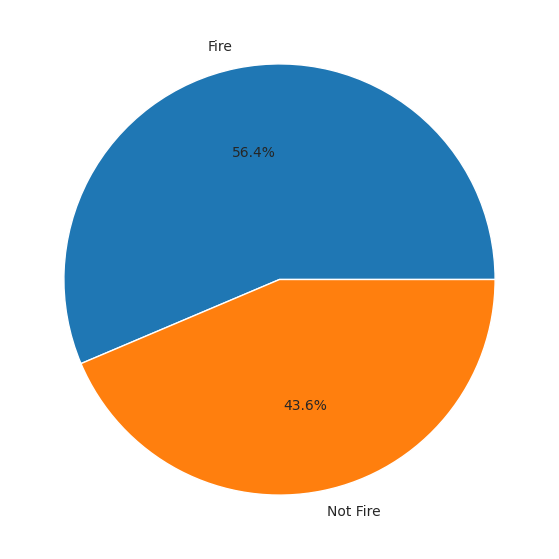

In [311]:
#plotting piechart
classlabels=['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')

In [312]:
##correlation

#conclu
'''
if RH increase temp will go down
if Rain increase temp will go down
if FFMC increase temp will also Increase
'''
df.corr()

,Day,Month,Year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
Month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


<Axes: >

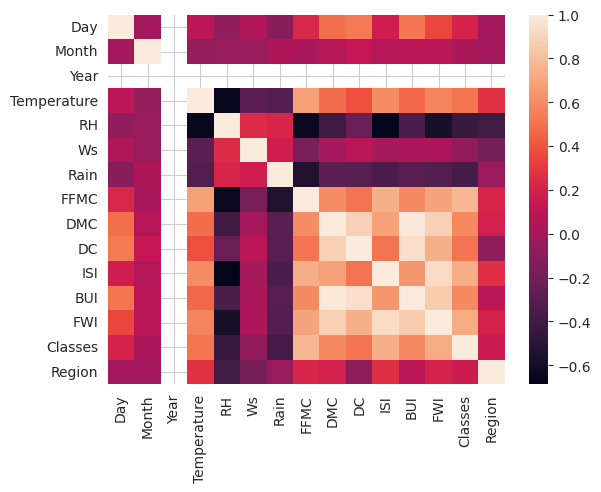

In [313]:
sns.heatmap(df.corr())

<Axes: ylabel='FWI'>

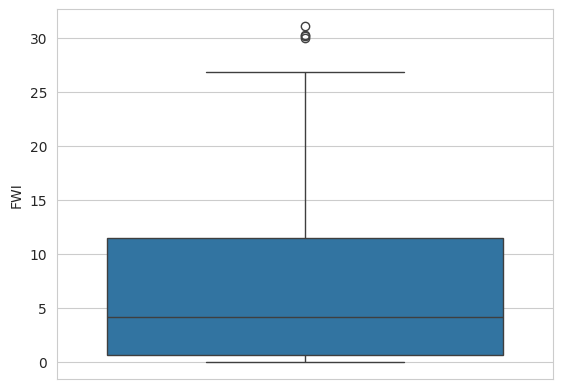

In [314]:
sns.boxplot(df['FWI'])

In [315]:
df.head()

,Day,Month,Year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
1,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
2,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
3,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
4,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
5,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


Text(0.5, 1.0, 'Fire Analysis Of Bejaia Regions')

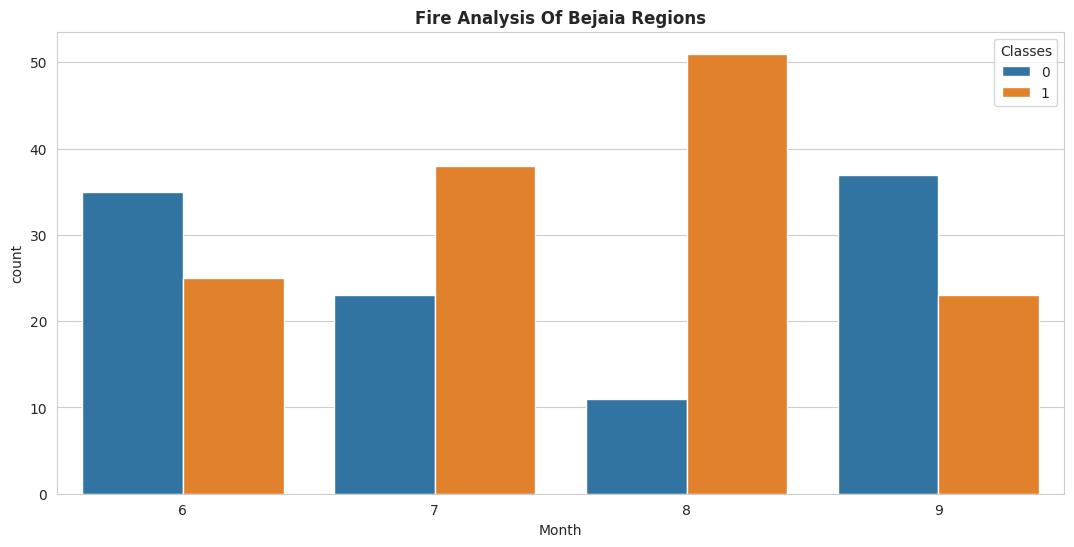

In [316]:
#monthly fire analysis becoz in summar is chance of fire
dftemp = df.loc[df['Region'] == 1]
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x='Month',hue='Classes',data=df) # hue is for categrize a categories
plt.title("Fire Analysis Of Bejaia Regions", weight='bold')

Text(0.5, 1.0, 'Fire Analysis Of Sidi- Bel Regions')

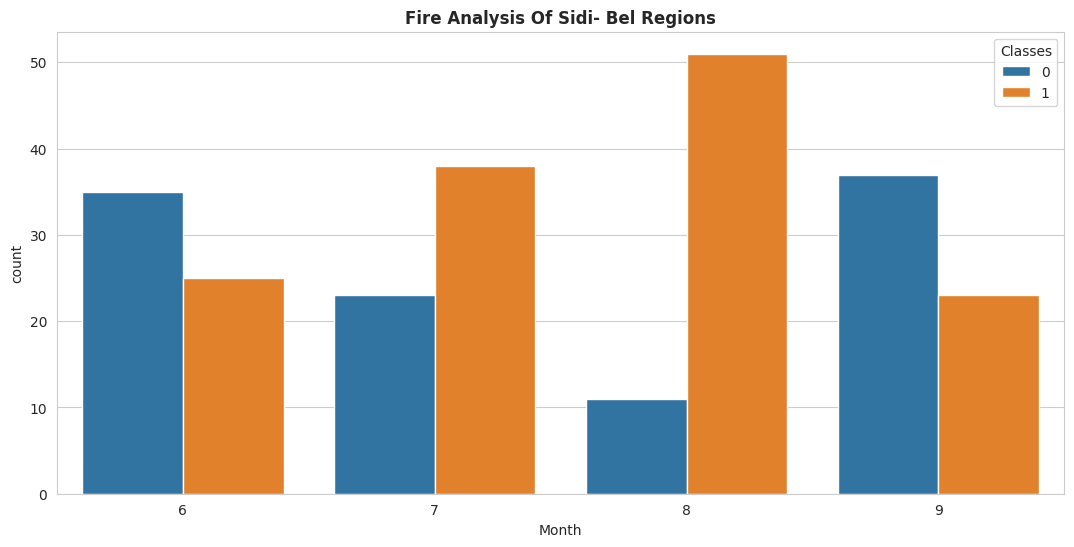

In [317]:
dftemp = df.loc[df['Region'] == 0]
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x='Month',hue='Classes',data=df) # hue is for categrize a categories
plt.title("Fire Analysis Of Sidi- Bel Regions", weight='bold')

Text(0.5, 1.0, 'Fire Analysis Of Sidi- Bel Regions')

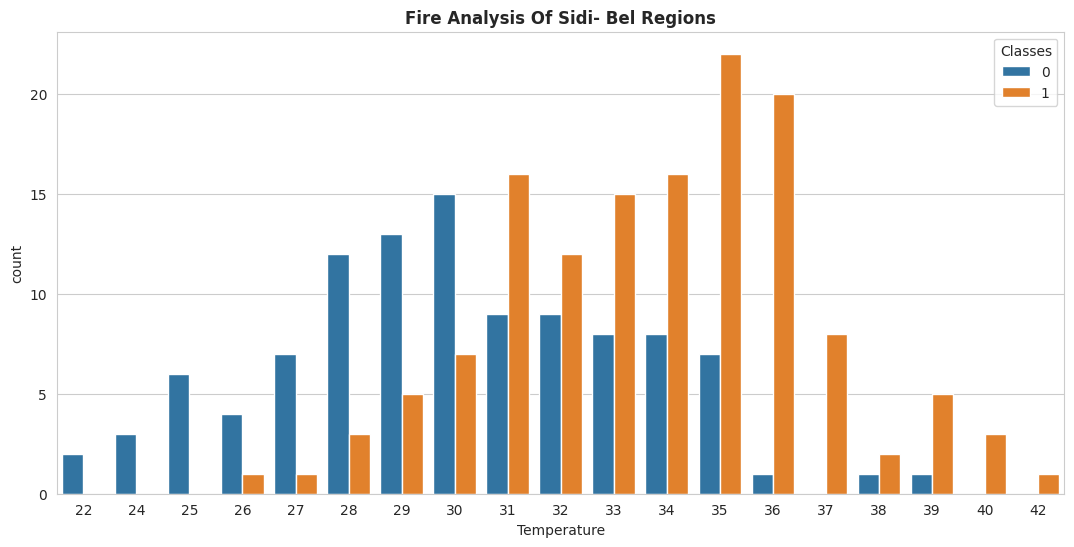

In [318]:
dftemp = df.loc[df['Region'] == 0]
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x='Temperature',hue='Classes',data=df) # hue is for categrize a categories
plt.title("Fire Analysis Of Sidi- Bel Regions", weight='bold')

#Model Making

In [319]:
df.drop(['Day','Month','Year'],axis=1,inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
1,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
2,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
3,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
4,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
5,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [320]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [321]:
#independant and dependant features
X = df.drop('FWI',axis=1)
y=df['FWI']

In [322]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [323]:
#Feature Selecion based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

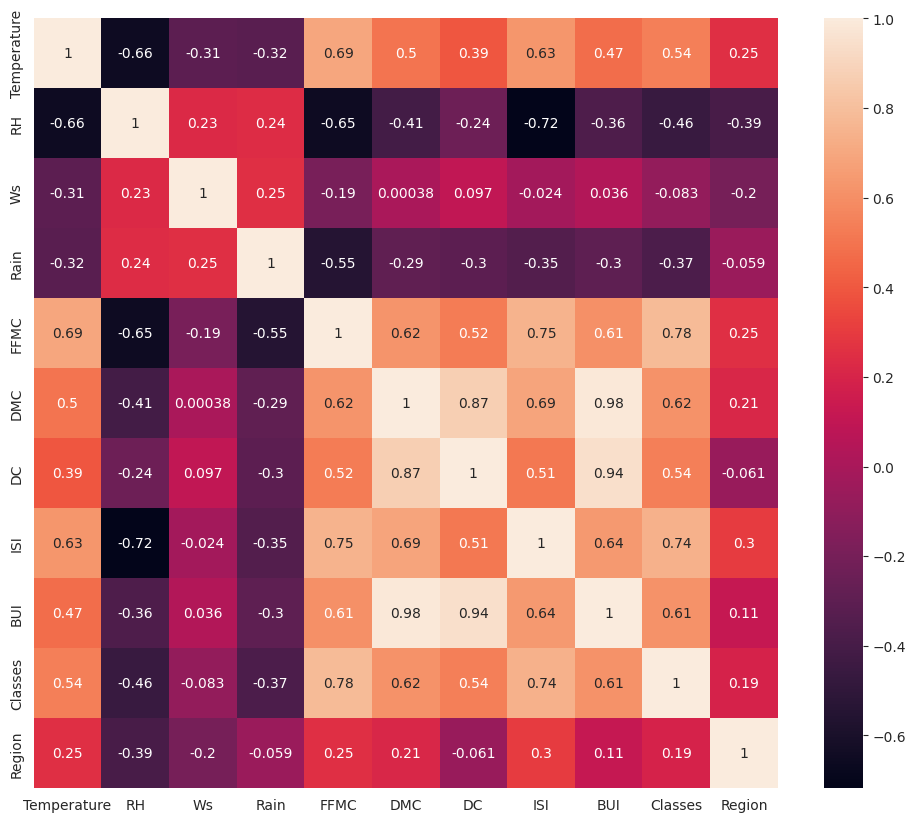

In [324]:
## checks for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [325]:
def correaltion(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [330]:
#thresehold domain expert
corr_features=correaltion(X_train,0.85)

In [331]:
#drop the features when corrlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

#Feature Scaling Or Standardization

In [332]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [335]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

Text(0.5, 1.0, 'X_train_scaled')

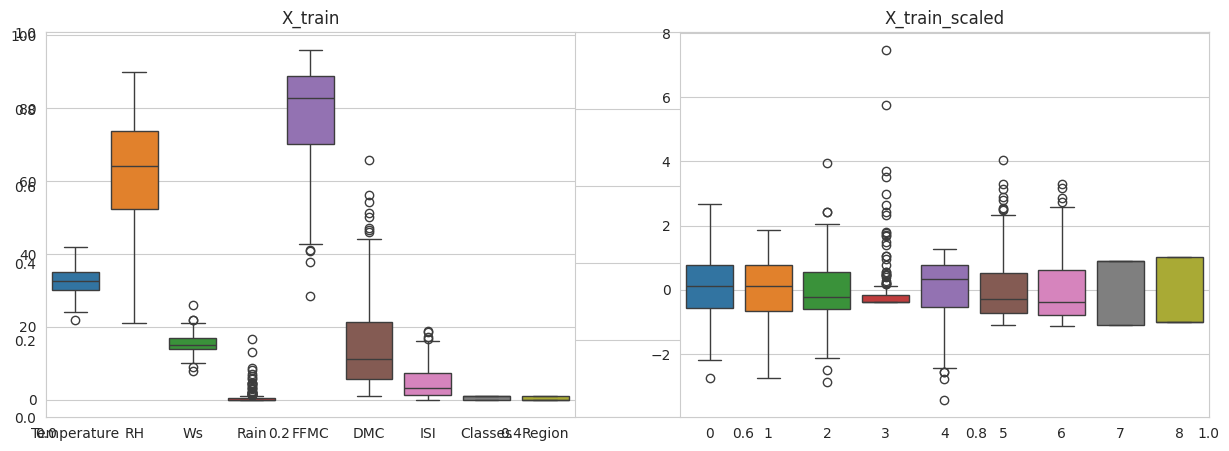

In [337]:
#box plot to understand effect of the standard scaler
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train")
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title("X_train_scaled")

#Linear Regression Model

mae 0.5468236465249986
R2 Score 0.9847657384266951


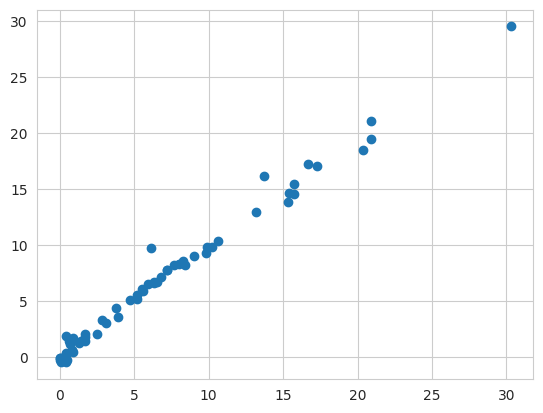

In [343]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
linear_model1 = LinearRegression()
linear_model1.fit(X_train_scaled,y_train)
y_pred = linear_model1.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mae",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

#LASSO Regression

mae 1.133175994914409
R2 Score 0.9492020263112388


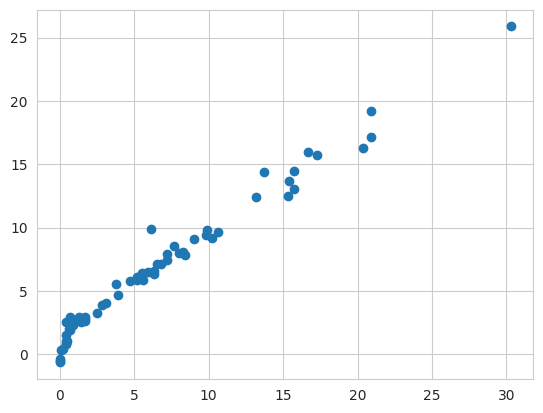

In [344]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

cross validation Lasso

In [358]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_test_scaled,y_test)

LassoCV(cv=5)

In [359]:
lassocv.alpha_

0.017311872921838636

In [360]:
lassocv.mse_path_

array([[ 16.28574002,  61.12020755,  21.42857936,  24.0671089 ,
        108.10921456],
       [ 15.52412088,  59.15088907,  18.70541866,  22.01254449,
        108.10921456],
       [ 13.92261884,  54.60727558,  16.34096508,  18.9945177 ,
        108.10921456],
       [ 12.52146655,  50.5760781 ,  14.28838556,  16.20042677,
        108.10921456],
       [ 11.29525486,  46.99590483,  12.50669774,  13.79968049,
        108.10921456],
       [ 10.22170722,  43.81299969,  10.96037903,  11.73906251,
        101.76528742],
       [  9.28166526,  38.29782479,   9.61839993,   9.97242139,
         92.73360444],
       [  8.45769489,  33.31823428,   8.45423573,   8.45974471,
         84.76125357],
       [  7.73532688,  28.99867354,   7.44438399,   7.1663439 ,
         77.71964912],
       [  7.10171315,  25.25240598,   6.56856473,   6.0621586 ,
         71.49301842],
       [  6.5456529 ,  22.00407744,   5.80915174,   5.1211449 ,
         65.98261566],
       [  6.05738006,  19.18808447,   5.150

mae 0.48849674716051034
R2 Score 0.9883892566704354


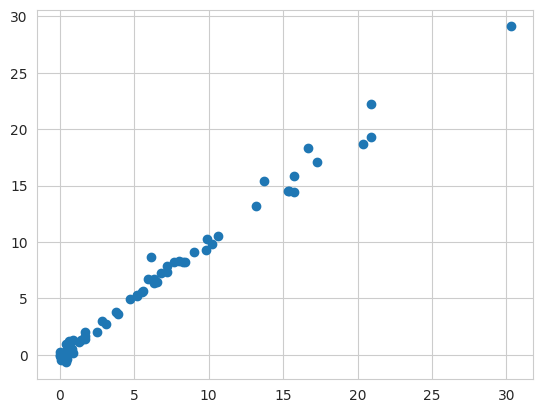

In [362]:
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

#Ridge Regression Model

mae 0.5642305340105692
R2 Score 0.9842993364555513


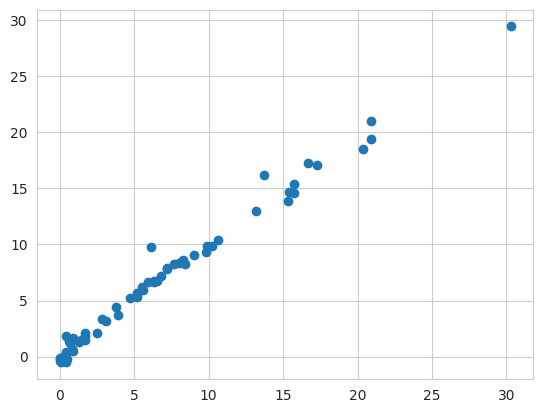

In [345]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

mae 0.5642305340105692
R2 Score 0.9842993364555513


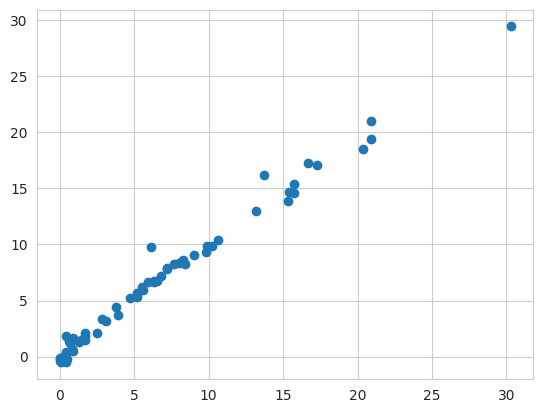

In [364]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

#Elasticnet Regression

mae 1.8822353634896005
R2 Score 0.8753460589519703


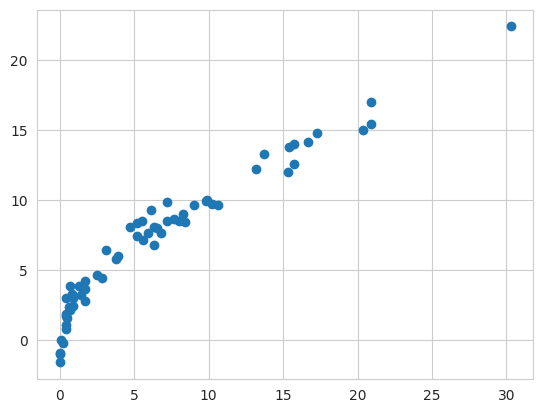

In [346]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)